# Выбор локации для скважины
## Краткое описание
Цель нашего проекта — проанализировать данные и определить наиболее выгодный регион для бурения новой скважины. Это важная задача для компании «ГлавРосГосНефть», поскольку правильный выбор региона может значительно увеличить прибыль компании и сократить возможные убытки.

В рамках проекта мы будем работать с данными, которые охватывают три различных региона. Для каждой скважины в этих регионах предоставлена информация о трёх признаках, а также объёме запасов нефти (в тысячах баррелей). Эти данные позволят нам оценить перспективы добычи в каждом из регионов и сформировать стратегическое решение о бурении.

## Цели и задачи проекта

1. **Изучение данных и подготовка**
    - Загрузка данных и ознакомление с ними.
    - Предварительная обработка данных для дальнейшего анализа.

2. **Построение и оценка модели**
    - Разделение данных на обучающую и валидационную выборки.
    - Построение модели линейной регрессии для предсказания объёма нефти.
    - Валидация модели: вычисление среднего запаса нефти и RMSE.

3. **Анализ доходности**
    - Расчет достаточного объёма нефти для безубыточной разработки.
    - Сравнение этого объема со средним запасом в каждом регионе.

4. **Расчет прибыли и оценка рисков**
    - Поиск лучших скважин по предсказанным значениям.
    - Оценка прибыли каждого региона методом Bootstrap.
    - Анализ средней прибыли, доверительных интервалов и рисков убытков.

5. **Выводы и рекомендации**
    - Предложение наиболее перспективного региона для разработки.
    - Обоснование сделанного выбора.

## Описание данных

Для реализации проекта мы используем данные геологоразведки трех различных регионов. Эти данные представлены в следующих файлах:

- `/datasets/geo_data_0.csv` - Данные первого региона.
- `/datasets/geo_data_1.csv` - Данные второго региона.
- `/datasets/geo_data_2.csv` - Данные третьего региона.

Каждый из этих файлов содержит информацию о скважинах региона и включает в себя следующие столбцы:

- **`id`**: Уникальный идентификатор скважины, который позволяет различать разные точки бурения.
- **`f0`, `f1`, `f2`**: Три числовых признака, которые описывают каждую скважину. Хотя конкретное значение этих признаков неизвестно, они играют ключевую роль в моделировании и предсказании.
- **`product`**: Объём запасов нефти в скважине, измеряемый в тысячах баррелей. Этот показатель является целевой переменной, которая будет использована в нашей модели для оценки прибыльности бурения.

## План работы

### 1. Загрузка и подготовка данных
- Загрузим данные из предоставленных файлов для трех регионов.
- Проведем базовый анализ данных: проверим наличие пропусков и дубликатов.
- Предварительно обработаем данные, если это необходимо (например, изменение типов данных, удаление или заполнение пропусков).

### 2. Обучение и проверка модели для каждого региона
#### 2.1. Разделение данных
- Разобьём данные на обучающую и валидационную выборки в соотношении 75:25 для каждого региона.

#### 2.2. Обучение модели
- Обучим модель линейной регрессии на обучающей выборке.
- Сделаем предсказания на валидационной выборке.

#### 2.3. Сохранение результатов
- Сохраним предсказания модели и правильные ответы на валидационной выборке для дальнейшего анализа.

#### 2.4. Оценка модели
- Выведем на экран средний объём предсказанного сырья и значение RMSE для каждой модели.

#### 2.5. Анализ результатов
- Проанализируем полученные результаты и сделаем выводы о качестве моделей.

### 3. Подготовка к расчету прибыли
#### 3.1. Определение ключевых значений
- Сохраним все ключевые значения для расчётов, такие как стоимость разработки и продажи нефти, в отдельных переменных.

#### 3.2. Расчет безубыточности
- Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.
- Сравним этот объём с средним запасом в каждом регионе.

#### 3.3. Выводы
- Сделаем выводы по подготовительной фазе расчётов прибыли.

### 4. Функция для расчета прибыли
#### 4.1. Выбор оптимальных скважин
- Определим скважины с максимальными значениями предсказанных объёмов сырья.

#### 4.2. Сумма объёмов
- Просуммируем целевое значение объёма сырья для выбранных скважин.

#### 4.3. Расчет прибыли
- Рассчитаем прибыль на основе полученных данных.

### 5. Оценка рисков и прибыли для каждого региона
#### 5.1. Bootstrap-оценка
- Применим технику Bootstrap с 1000 выборок, чтобы исследовать распределение прибыли.

#### 5.2. Анализ результатов
- Рассчитаем среднюю прибыль, 95%-й доверительный интервал и оценим риск убытков (где убыток — это отрицательная прибыль).

#### 5.3. Выводы и рекомендации
- Сделаем выводы по результатам: предложим оптимальный регион для разработки и обоснуем наш выбор на основании полученных данных.



## Импорты библиотек

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

    ## Загрузка данных

In [2]:
geo_df_01_path = 'datasets/geo_data_0.csv'
geo_df_02_path = 'datasets/geo_data_1.csv'
geo_df_03_path = 'datasets/geo_data_2.csv'

geo_df_01_url = 'https://code.s3.yandex.net/datasets/geo_data_0.csv'
geo_df_02_url = 'https://code.s3.yandex.net/datasets/geo_data_1.csv'
geo_df_03_url = 'https://code.s3.yandex.net/datasets/geo_data_2.csv'

def load_data(file_path, file_url, sep=","):
    if os.path.exists(file_path):
        data = pd.read_csv(file_path, sep=sep)
    else:
        data = pd.read_csv(file_url, sep=sep)
    return data

geo_df_01 = load_data(geo_df_01_path, geo_df_01_url)
geo_df_02 = load_data(geo_df_02_path, geo_df_02_url)
geo_df_03 = load_data(geo_df_03_path, geo_df_03_url)



## Функции для проекта

In [3]:
# Функция для обработки данных датафрейма
def research(df):
    # Отображение первых 5 строк таблицы для ознакомления
    print("Первые 5 строк таблицы:")
    display(df.head())

    # Общая информация о таблице
    print("\nИнформация о таблице:")
    df_info = pd.DataFrame({
        "columns": df.columns,
        "dtype": df.dtypes,
        "non-null count": df.count()
    })
    display(df_info)

    # Проверка на пропуски
    print("\nАнализ пропущенных значений:")
    missing_data = pd.DataFrame({
        "Пропуски (шт.)": df.isna().sum(),
        "Пропуски (%)": df.isna().mean() * 100
    })
    display(missing_data)

    # Статистическое описание данных
    print("\nСтатистическое описание данных:")
    display(df.describe())

    # Проверка на явные дубликаты
    num_duplicates = df.duplicated().sum()
    print(f"Число явных дубликатов: {num_duplicates}")

    if num_duplicates:
        print("ВНИМАНИЕ: Данные содержат дубликаты!")


def oil_hist(seria, bins, xlim_max, ylim_max):
    plt.figure(figsize=[12,9])

    plt.hist(seria, bins=bins)

    plt.xlim(0, xlim_max)
    plt.ylim(0, ylim_max)

    plt.xlabel("Объем нефти на скважину в тыс. барелей")
    plt.ylabel("Количество скважин")

    plt.title("Гистограмма распраделения по объему скважин")
    plt.show()


## Данные по 1-у датасету



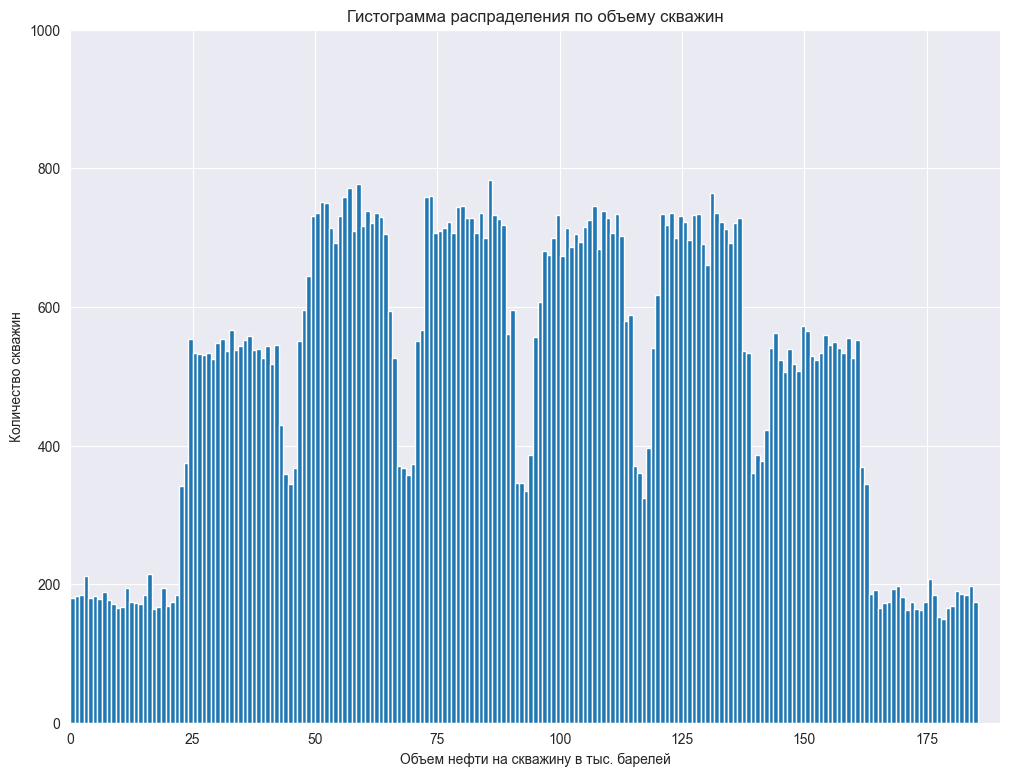

In [4]:
oil_hist(geo_df_01['product'], 200, 190, 1000)

In [5]:
research(geo_df_01)

Первые 5 строк таблицы:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



Информация о таблице:


,columns,dtype,non-null count
id,id,object,100000
f0,f0,float64,100000
f1,f1,float64,100000
f2,f2,float64,100000
product,product,float64,100000



Анализ пропущенных значений:


,Пропуски (шт.),Пропуски (%)
id,0,0.0
f0,0,0.0
f1,0,0.0
f2,0,0.0
product,0,0.0



Статистическое описание данных:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Число явных дубликатов: 0


## Данные по 2-у датасету


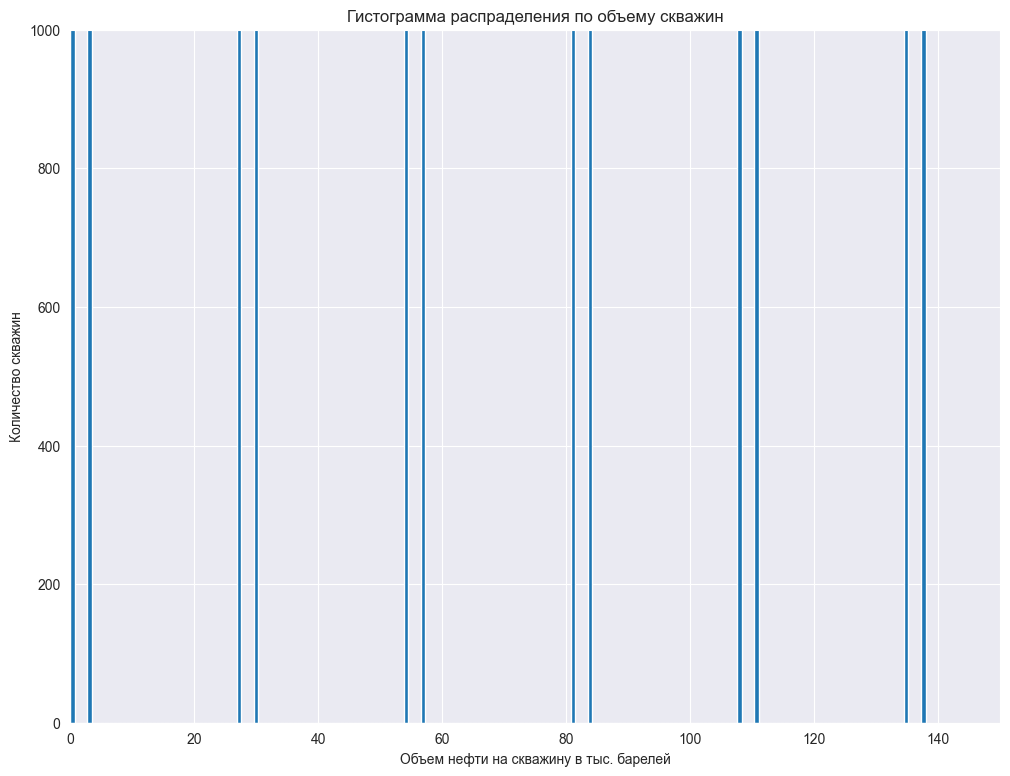

In [6]:
oil_hist(geo_df_02['product'], 200, 150, 1000)

In [7]:
research(geo_df_02)

Первые 5 строк таблицы:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



Информация о таблице:


,columns,dtype,non-null count
id,id,object,100000
f0,f0,float64,100000
f1,f1,float64,100000
f2,f2,float64,100000
product,product,float64,100000



Анализ пропущенных значений:


,Пропуски (шт.),Пропуски (%)
id,0,0.0
f0,0,0.0
f1,0,0.0
f2,0,0.0
product,0,0.0



Статистическое описание данных:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Число явных дубликатов: 0


## Данные по 3-у датасету

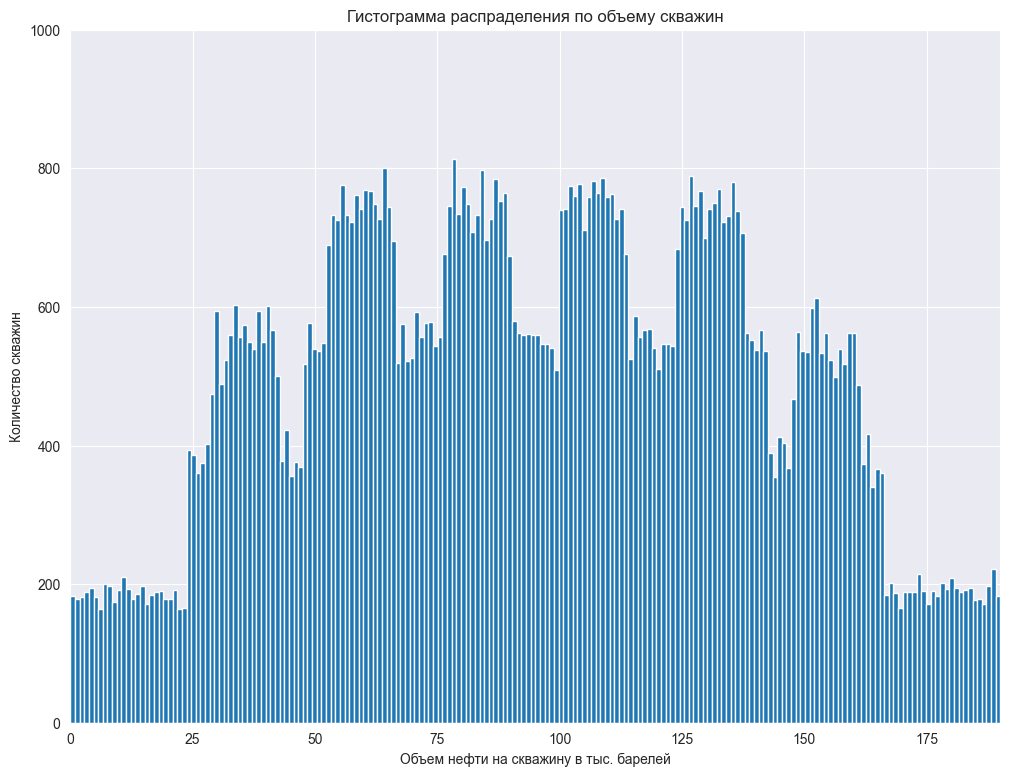

In [8]:
oil_hist(geo_df_03['product'], 200, 190, 1000)

In [9]:
research(geo_df_03)

Первые 5 строк таблицы:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



Информация о таблице:


,columns,dtype,non-null count
id,id,object,100000
f0,f0,float64,100000
f1,f1,float64,100000
f2,f2,float64,100000
product,product,float64,100000



Анализ пропущенных значений:


,Пропуски (шт.),Пропуски (%)
id,0,0.0
f0,0,0.0
f1,0,0.0
f2,0,0.0
product,0,0.0



Статистическое описание данных:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Число явных дубликатов: 0


### Промежутночный вывод
#### Данные без явных дубликатов, без пропусков, нормальные названия столбцов, подходящие типы данных


## Подготовим данные


#### Удалим ненужный столбец `id`, он никак не влияет на данные

In [10]:
geo_df_01 = geo_df_01.drop(['id'], axis=1)
geo_df_02 = geo_df_02.drop(['id'], axis=1)
geo_df_03 = geo_df_03.drop(['id'], axis=1)

## Обучение и проверка модели

In [11]:
# Функция для обучения модели линейной регрессии и предсказания объема сырья.
def region_prediction(df):
    # Разделение данных на признаки и целевую переменную
    features = df.drop("product", axis=1)
    target = df["product"]

    # Разбиение на обучающую и валидационную выборки
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345
    )

    # Масштабирование данных
    scaler = StandardScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)

    # Обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(features_train, target_train)

    # Получение предсказаний
    predictions = model.predict(features_valid)
    predictions = pd.Series(predictions)

    # Вычисление RMSE
    rmse = np.sqrt(mean_squared_error(target_valid, predictions))

    # Средние значения запасов
    stock_mean = target.mean()
    stock_mean_pred = predictions.mean()

    return predictions, rmse, stock_mean, stock_mean_pred, target_valid.reset_index(drop=True)

In [12]:
def print_region_results(region_number, rmse, stock_mean_pred):
    print(f"Результаты для региона №{region_number}:\n"
          f"-------------------------------\n"
          f"RMSE модели: {rmse:.3f}\n"
          f"Средний запас предсказанного сырья: {stock_mean_pred:.3f} тыс. баррелей\n"
          "-------------------------------\n")


pred_1, rmse_1, stock_mean_1, stock_mean_pred_1, target_valid_1 = region_prediction(geo_df_01)
print_region_results(1, rmse_1, stock_mean_pred_1)

pred_2, rmse_2, stock_mean_2, stock_mean_pred_2, target_valid_2 = region_prediction(geo_df_02)
print_region_results(2, rmse_2, stock_mean_pred_2)

pred_3, rmse_3, stock_mean_3, stock_mean_pred_3, target_valid_3 = region_prediction(geo_df_03)
print_region_results(3, rmse_3, stock_mean_pred_3)

Результаты для региона №1:
-------------------------------
RMSE модели: 37.579
Средний запас предсказанного сырья: 92.593 тыс. баррелей
-------------------------------

Результаты для региона №2:
-------------------------------
RMSE модели: 0.893
Средний запас предсказанного сырья: 68.729 тыс. баррелей
-------------------------------

Результаты для региона №3:
-------------------------------
RMSE модели: 40.030
Средний запас предсказанного сырья: 94.965 тыс. баррелей
-------------------------------



### Промежуточный вывод
Наибольший запас сырья в 3-м регионе: 94.965 тыс. баррелей

## Подготовка к расчету прибыли

По условиям задачи:

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).

- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

- Бюджет на разработку скважин в регионе — 10 млрд рублей.

- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [13]:
#Из условий задачи
total_points = 500
best_points = 200
budget = 10000000000
income = 450000
risk_assessment = 0.025

#### Бюджет бурения одного месторождения:


In [14]:
budget_of_one_point = budget/best_points
print('руб:', budget_of_one_point)

руб: 50000000.0


#### Объем сырья для безубыточной разработки новой скважины:


In [15]:
budget_pluse = budget_of_one_point / income
print(f'Объем: {budget_pluse:.3f} т. баррелей')

Объем: 111.111 т. баррелей


#### Выведем распределение предсказанных значений

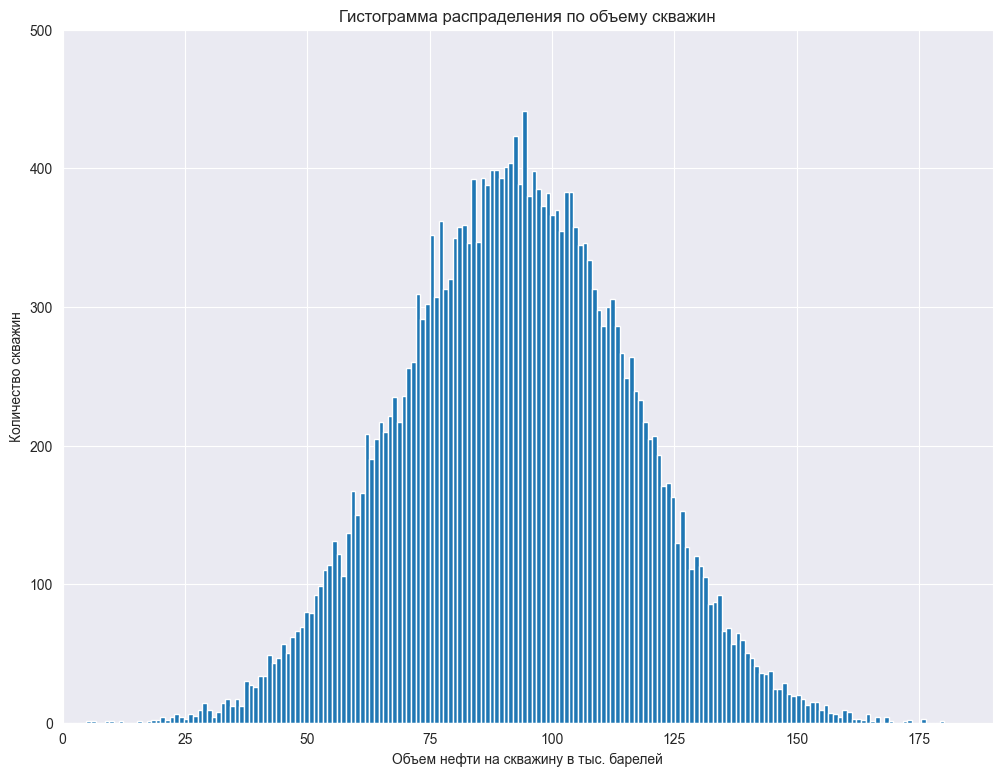

In [16]:
oil_hist(pred_1, 200, 190, 500)

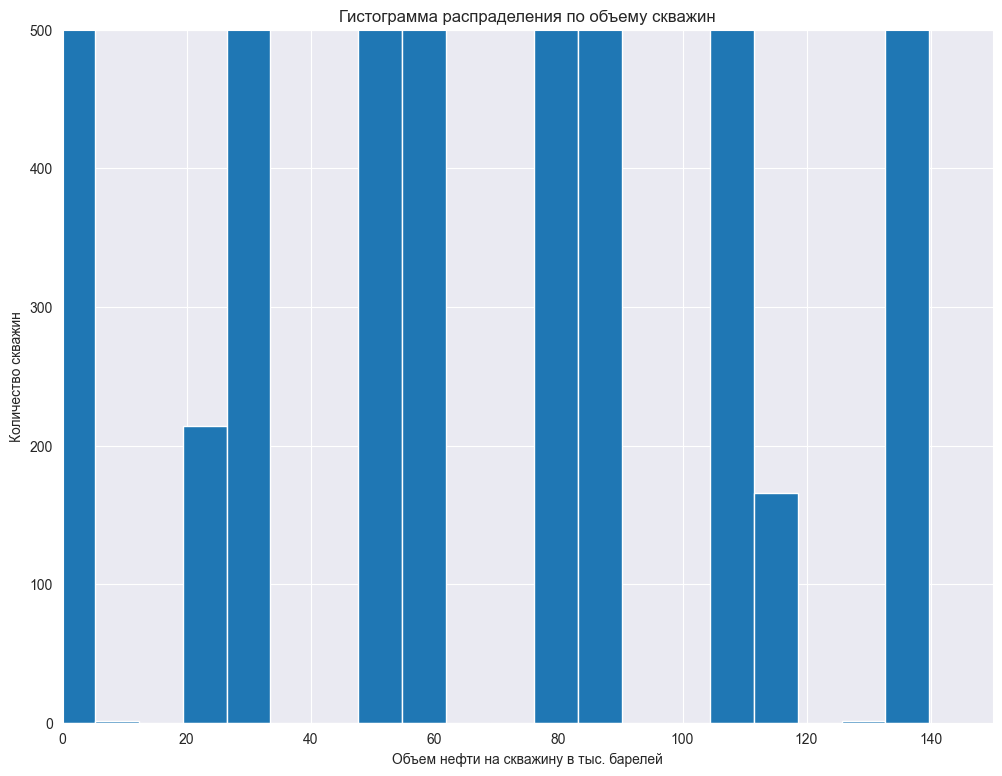

In [17]:
oil_hist(pred_2, 20, 150, 500)

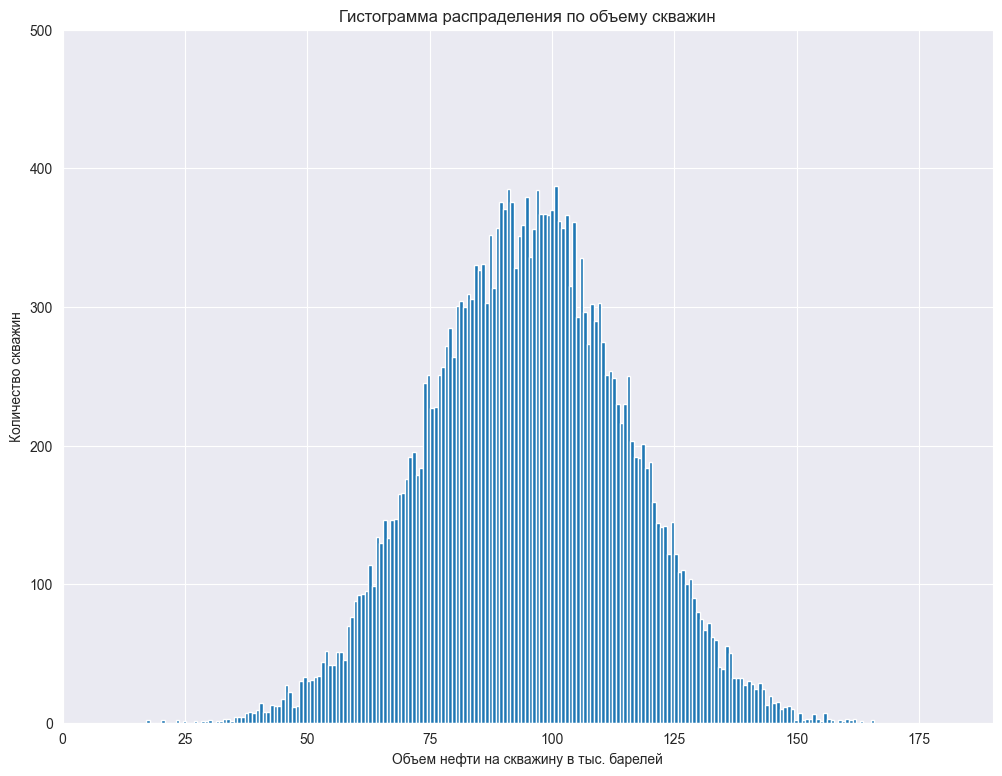

In [18]:
oil_hist(pred_3, 200, 190, 500)

### Промежуточный вывод:

- **Бюджет бурения одного месторождения**: 50,000,000 рублей.
- **Объём сырья для безубыточной разработки новой скважины**: 111.111 тысяч баррелей.

## Функция для расчета прибыли


In [19]:
def profit(predictions, target):
    df = pd.concat([predictions, target], axis=1)
    df.columns = ['prediction', 'target']

    df = df.sort_values(by='prediction', ascending=False)[:best_points]

    return (df['target'].sum() * income - budget)


income_1 = profit(pred_1, target_valid_1)
print('Прибыль для полученного объема сырья в регионе №1: {:.2f} руб.'.format(income_1))

income_2 = profit(pred_2, target_valid_2)
print('Прибыль для полученного объема сырья в регионе №2: {:.2f} руб.'.format(income_2))

income_3 = profit(pred_3, target_valid_3)
print('Прибыль для полученного объема сырья в регионе №3: {:.2f} руб.'.format(income_3))

Прибыль для полученного объема сырья в регионе №1: 3320826043.14 руб.
Прибыль для полученного объема сырья в регионе №2: 2415086696.68 руб.
Прибыль для полученного объема сырья в регионе №3: 2710349963.60 руб.


### Промежуточный вывод:
#### Наибольшая прибыль в регионе №1 = 3320826043.14 руб

## Расчет прибыли и рисков

In [20]:
def estimate(prediction, target):
    random_state = np.random.RandomState(12345)

    profit_values = []

    # Бутстрап выборка и расчет прибыли
    for _ in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=random_state)
        pred_subsample = prediction[target_subsample.index]
        profit_values.append(profit(pred_subsample, target_subsample))

    profit_series = pd.Series(profit_values)

    mean_profit = profit_series.mean()
    confidence_lower = profit_series.quantile(0.025)
    confidence_upper = profit_series.quantile(0.975)
    risk_of_loss = (profit_series < 0).mean()

    print(f"Средняя прибыль = {mean_profit:.2f} руб.")
    print(f"95% доверительный интервал от {confidence_lower:.2f} до {confidence_upper:.2f} руб.")
    print(f"Процент риска {risk_of_loss:.1%}")

### Прибыль и риски по 1-у региону

In [21]:
region_1 = estimate(pred_1, target_valid_1)

Средняя прибыль = 396164984.80 руб.
95% доверительный интервал от -111215545.89 до 909766941.55 руб.
Процент риска 6.9%


### Прибыль и риски по 2-у региону

In [22]:
region_2 = estimate(pred_2, target_valid_2)

Средняя прибыль = 456045105.79 руб.
95% доверительный интервал от 33820509.40 до 852289453.87 руб.
Процент риска 1.5%


### Прибыль и риски по 3-у региону

In [23]:
region_3 = estimate(pred_3, target_valid_3)

Средняя прибыль = 404403866.57 руб.
95% доверительный интервал от -163350413.40 до 950359574.92 руб.
Процент риска 7.6%


### Промежуточный вывод:
#### Второй регион оказался с наименьшим риском, всего 1.5%
#### А также с наибольшей средней прибылью 456045105.79 руб.

# Заключение

### Подготовка данных
- Мы подготовили данные, проверив их на наличие дубликатов и пропусков, а также изучили форматы всех данных.

### Анализ и обучение модели
- Данные были разбиты на обучающую и валидационную выборки.
- Обучена модель и рассчитано среднеквадратичное отклонение предсказаний по валидационной выборке.

### Функции расчета и Bootstrap
- Разработаны функции для расчета прибыли и процедуры Bootstrap.
- С помощью Bootstrap анализ проведен путем разбивки выборок на 500 значений. Из каждой выборки отобрано 200 с наибольшим объемом нефти, затем рассчитан суммарный доход, вычтен бюджет на разработку и в итоге получена прибыль или убыток. Эта процедура повторена 1000 раз.
- Определено отношение количества убыточных кейсов к общему числу кейсов.

### Результаты анализа
- Средний объем нефти в регионе был сравнен с минимальным объемом, необходимым для окупаемости скважины. Обнаружено, что в среднем по всем регионам этот показатель ниже желаемого уровня.
- Изучено распределение объемов нефти в скважинах, в одном из регионов наблюдается заметно меньшая изменчивость.
- Рассчитаны доверительный интервал и вероятность убытка.

### Итог
- Наиболее потенциально безопасным с точки зрения инвестиций в разработку является второй регион, так как он демонстрирует самую низкую вероятность убытка и самую высокую среднюю прибыль.